<a href="https://colab.research.google.com/github/menglin874/BITM/blob/main/Gabor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi
from skimage import data#引入数据
from skimage.util import img_as_float
from skimage.filters import gabor_kernel#引入Gabor核
import math
import cv2,os




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install LogGabor

In [ ]:
# 16 kernels
kernels = []
for theta in range(4):
  theta = theta / 4. * np.pi#orientation（0，45,90,135）
  for sigma in (1, 3):
    for frequency in (0.05, 0.25):
      kernel = np.real(gabor_kernel(frequency, theta=theta,
      sigma_x=sigma, sigma_y=sigma))
      kernels.append(kernel)

#16 kernels.theta4*sigma2*frequency2=16



In [ ]:
filters = []
ksize = [3,9,11,13] # gabor size，4
lamda = np.pi/2.0         
for theta in np.arange(0, np.pi+0.1, np.pi / 5): #orientation，0°，36°，72°，108°，144°，180°
  for K in range(4):
    kern = cv2.getGaborKernel((ksize[K], ksize[K]), 1.0, theta, lamda, 0.5, 0, ktype=cv2.CV_32F)
    kern /= 1.5*kern.sum()
    filters.append(kern)
    


24


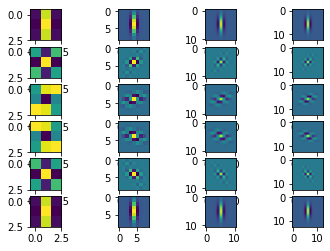

In [ ]:
print(len(filters))
plt.figure(1)

#image filters
for temp in range(len(filters)):
  plt.subplot(6, 4, temp + 1)
  plt.imshow(filters[temp])
plt.show()


In [ ]:
shrink = (slice(0, None, 1), slice(0, None, 1))
brick = img_as_float(data.brick())[shrink]
grass = img_as_float(data.grass())[shrink]
gravel = img_as_float(data.gravel())[shrink]
image_names = ('brick', 'grass', 'gravel')
images = (brick, grass, gravel)

In [ ]:
from LogGabor import imread
image = imread('/content/drive/MyDrive/outputs/covidlung.jpg')


(624, 628)


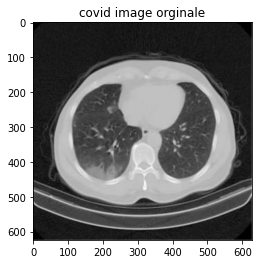

"\n#设定各个子图像的位置\nfig, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 8))\nplt.gray()\nfig.suptitle('Images', fontsize=12)\n#axes[0][0].axis('off')\n# 绘制原始图像\nfor label, img, ax in zip(image_names1, images1, axes[0:]):\n  ax.imshow(img)\n  ax.set_title(label, fontsize=9)\n  ax.axis('off')\n"

In [ ]:
shrink = (slice(0, None, 1), slice(0, None, 1))
covid = img_as_float(image)[shrink] #(624, 628)
print(covid.shape)
images1 = (brick, grass, gravel,covid)
image_names1 = ('brick', 'grass', 'gravel', 'covid')

plt.imshow(covid, cmap = 'gray')
plt.title("covid image orginale")
plt.show()


In [ ]:
kernels = filters

In [ ]:
def compute_feats(image, kernels):#Calculating the characteristic function
  feats = np.zeros((len(kernels), 2), dtype=np.double)
  for k, kernel in enumerate(kernels):
    filtered = ndi.convolve(image, kernel, mode='wrap')
    feats[k, 0] = filtered.mean()
    feats[k, 1] = filtered.var()
  return feats
#PreparationReferenceFeatures
ref_feats = np.zeros((1, len(kernels), 2), dtype=np.double)
ref_feats[0, :, :] = compute_feats(covid, kernels)
#ref_feats[1, :, :] = compute_feats(grass, kernels)
#ref_feats[2, :, :] = compute_feats(gravel, kernels)

In [ ]:
def match(feats, ref_feats):# Matching function for calculating least square error
  min_error = np.inf
  min_i = None
  for i in range(ref_feats.shape[0]):
    error = np.sum((feats - ref_feats[i, :])**2)
    if error < min_error:
      min_error = error
      min_i = i
  return min_i

In [ ]:
print('Rotated images matched against references using Gabor filter banks:')

print('original: covid, rotated: 30deg, match result: ', end='')
feats = compute_feats(ndi.rotate(covid, angle=30, reshape=False), kernels)
#print(image_names[match(feats, ref_feats)])





Rotated images matched against references using Gabor filter banks:
original: covid, rotated: 30deg, match result: brick


"\nprint('original: brick, rotated: 70deg, match result: ', end='')\nfeats = compute_feats(ndi.rotate(brick, angle=70, reshape=False), kernels)\nprint(image_names[match(feats, ref_feats)])\nprint('original: grass, rotated: 145deg, match result: ', end='')\nfeats = compute_feats(ndi.rotate(grass, angle=145, reshape=False), kernels)\nprint(image_names[match(feats, ref_feats)])\n"

In [ ]:
# Calculate the power diagram of the corresponding kernel after normalisation
def power(image, kernel):
# Normalisation of images for better comparison
  image = (image - image.mean()) / image.std()
  return np.sqrt(ndi.convolve(image, np.real(kernel), mode='wrap')**2 + ndi.convolve(image, np.imag(kernel), mode='wrap')**2)

In [ ]:

    
# Plot the filter bank kernel and its response.
results = []
kernel_params = []
filters = []
'''
for theta in (0, 1):
  theta = theta / 4. * np.pi
  for frequency in (0.1, 0.4):
    kernel = gabor_kernel(frequency, theta=theta)
    '''
ksize = [1,3,5,8] # 4 gabor sizes
lamda = np.pi/2.0         
for K in range(4):

  #print(theta)
  for theta in np.arange(0, np.pi+0.1, np.pi / 5): #orientation，0°，36°，72°，108°，144°，180°
    kern = cv2.getGaborKernel((ksize[K], ksize[K]), 1.0, theta, lamda, 0.5, 0, ktype=cv2.CV_32F)
    kern /= 1.5*kern.sum()
    
    params = 'theta=%d,\néchelle=%.2f' % (theta * 180 / np.pi, ksize[K])
    kernel_params.append(params)
    
  
# Save the kernel and power images for each image
    filters.append(kern)
    results.append(power(covid, kern))
    #results.append((kern, power(covid, kern)))

24
24


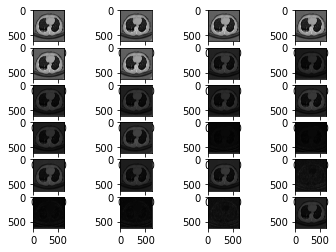

In [ ]:
print(len(results)) #24
print(len(kernel_params))
for temp in range(len(results)):
  plt.subplot(6, 4, temp + 1)
  plt.imshow(results[temp])
plt.show()


"\n# 绘制原始图像\nfor label, img, ax in zip(row_names, images, axes[0][1:]):\n  ax.imshow(img)\n  ax.set_title(label, fontsize=9)\n  ax.axis('off')\nfor label, (kernel, powers), ax_row in zip(kernel_params, results, axes[1:]):\n# 绘制Gabor核\n  ax = ax_row[0]\n  ax.imshow(np.real(kernel))\n  ax.set_ylabel(label, fontsize=7)\n  ax.set_xticks([])\n  ax.set_yticks([])\n# 绘制Gabor响应，每个滤波器使用对比度归一化\n  vmin = np.min(powers)\n  vmax = np.max(powers)\n  for patch, ax in zip(powers, ax_row[1:]):\n    ax.imshow(patch, vmin=vmin, vmax=vmax)\n    ax.axis('off')\n"

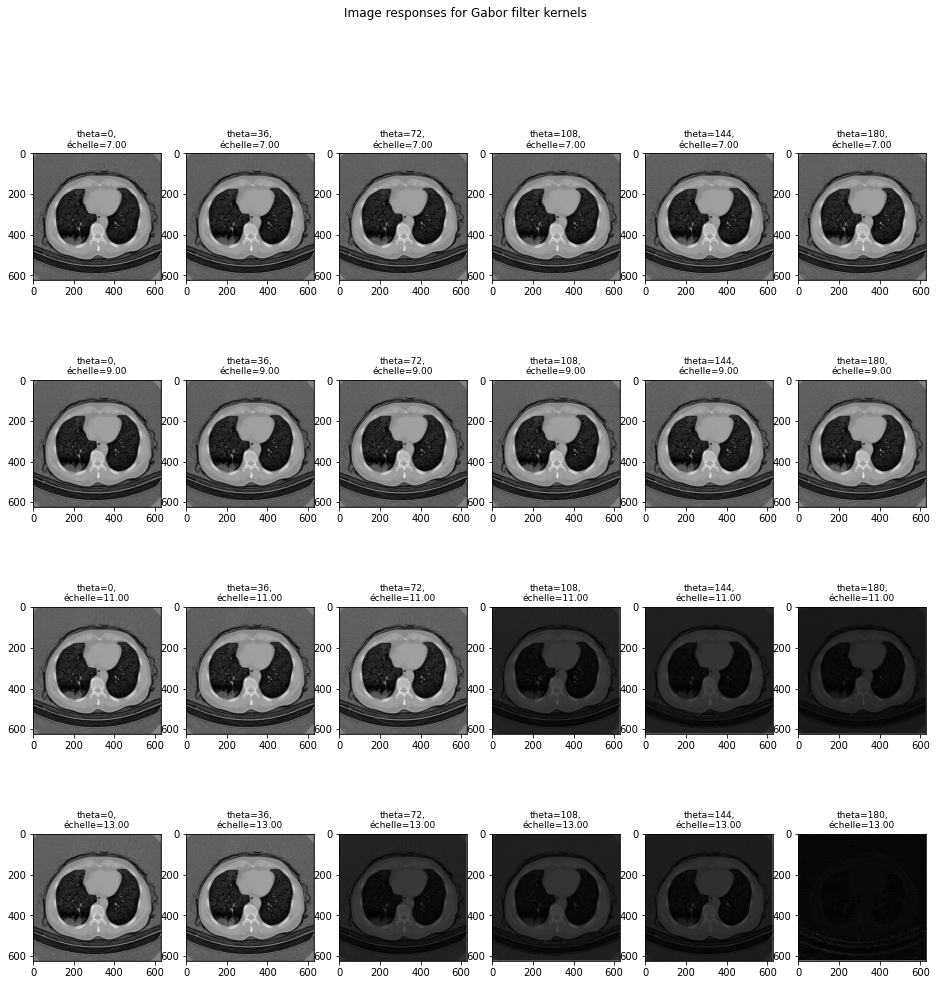

In [ ]:

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 16))
plt.gray()
fig.suptitle('Image responses for Gabor filter kernels', fontsize=12)

#axes[0][0].axis('off')

col_names= (7, 9, 11, 13) # j
row_names= ( 0, 36, 72, 108, 144, 180) # i 

for i in range(4):
  for j in range(6):
    vmin = np.min(results)
    vmax = np.max(results)
    params = 'theta=%d,\néchelle=%.2f' % (row_names[j],col_names[i])#核的标题
    #kernel_params.append(params)
    
    axes[i][j].imshow(results[i*j],cmap = 'gray') #vmin=vmin, vmax=vmax 
    axes[i][j].set_title(params, fontsize=9)
    #axes[i][j].axis('off')





In [ ]:
print(type(results))
print(len(results))

print(results[0][0,0])
print(results[1][0,0])

for i in range(1,24):
  print(results[i][0,0])
  if results[i-1][0,0]<results[i][0,0]:
    vn = i-1
print(vn)

<class 'list'>
24
0.8576066264955886
0.8576066264955886
0.8576066264955886
0.8576066264955886
0.8576066264955886
0.8576066264955886
0.8576066264955886
1.8921986366127839
1.475873303291892
1.9407773467700669
1.6025496673164916
1.1391990796072715
1.8921986366127839
2.275370499566326
1.160062997999951
21.952007566852114
17.7193871506797
0.8176854516824422
2.275370499566326
2.1663234794778874
11.138358633574194
19.31819429390037
11.453660025844373
17.5683137018684
2.1663234794778874
21


In [ ]:
vals = list()

for i in range(624):
  for j in range(628):
    for k in range(1,24):
      if results[k-1][i,j]<=results[k][i,j]:
        val = k-1
    #print(val)
    vals.append(val)
print(len(vals))

391872


In [ ]:
print(vals)

In [ ]:
vqls = np.array(vals)
print(vqls.shape)
vqls.reshape((624,628))
vq = vqls.reshape((624,628))
print(vq.shape)

(391872,)
(624, 628)


Codage binares du grays

In [ ]:
#import math as mt
 
# This function generates all n bit Gray
# codes and prints the generated codes
def generateGrayarr(n):
 
    # base case
    if (n <= 0):
        return
 
    # 'arr' will store all generated codes
    arr = list()
 
    # start with one-bit pattern
    arr.append("0")
    arr.append("1")
 
    # Every iteration of this loop generates
    # 2*i codes from previously generated i codes.
    i = 2
    j = 0
    while(True):
 
        if i >= 1 << n:
            break
     
        # Enter the previously generated codes
        # again in arr[] in reverse order.
        # Nor arr[] has double number of codes.
        for j in range(i - 1, -1, -1):
            arr.append(arr[j])
 
        # append 0 to the first half
        for j in range(i):
            arr[j] = "0" + arr[j]
 
        # append 1 to the second half
        for j in range(i, 2 * i):
            arr[j] = "1" + arr[j]
        i = i << 1
 
    # print contents of arr[]
    for i in range(len(arr)):
        print(arr[i])
    return arr
 
# Driver Code
generateGrayarr(5)
 
# This code is contributed
# by Mohit kumar 29


00000
00001
00011
00010
00110
00111
00101
00100
01100
01101
01111
01110
01010
01011
01001
01000
11000
11001
11011
11010
11110
11111
11101
11100
10100
10101
10111
10110
10010
10011
10001
10000


['00000',
 '00001',
 '00011',
 '00010',
 '00110',
 '00111',
 '00101',
 '00100',
 '01100',
 '01101',
 '01111',
 '01110',
 '01010',
 '01011',
 '01001',
 '01000',
 '11000',
 '11001',
 '11011',
 '11010',
 '11110',
 '11111',
 '11101',
 '11100',
 '10100',
 '10101',
 '10111',
 '10110',
 '10010',
 '10011',
 '10001',
 '10000']

In [ ]:
code = generateGrayarr(5)[0:24]
print(type(code))

cdg = np.array(code)
print(cdg)


00000
00001
00011
00010
00110
00111
00101
00100
01100
01101
01111
01110
01010
01011
01001
01000
11000
11001
11011
11010
11110
11111
11101
11100
10100
10101
10111
10110
10010
10011
10001
10000
<class 'list'>
['00000' '00001' '00011' '00010' '00110' '00111' '00101' '00100' '01100'
 '01101' '01111' '01110' '01010' '01011' '01001' '01000' '11000' '11001'
 '11011' '11010' '11110' '11111' '11101' '11100']


In [ ]:
print(vq.shape)
print(vq)

(624, 628)
[[19 20 20 ... 20 20 21]
 [22 19 20 ... 20 22 22]
 [22 19 21 ... 20 22 22]
 ...
 [20 20 19 ... 20 21 19]
 [20 20 19 ... 22 19 20]
 [20 20 19 ... 20 19 19]]


In [ ]:
img = np.zeros((624,628))

for i in range(624):
  for j in range(628):
    n = vq[i,j]
    bi = code[n]
    
    img[i,j] = int(bi,2)/255
    #print(img[i,j]) 



print(img)


[[0.10196078 0.11764706 0.11764706 ... 0.11764706 0.11764706 0.12156863]
 [0.11372549 0.10196078 0.11764706 ... 0.11764706 0.11372549 0.11372549]
 [0.11372549 0.10196078 0.12156863 ... 0.11764706 0.11372549 0.11372549]
 ...
 [0.11764706 0.11764706 0.10196078 ... 0.11764706 0.12156863 0.10196078]
 [0.11764706 0.11764706 0.10196078 ... 0.11372549 0.10196078 0.11764706]
 [0.11764706 0.11764706 0.10196078 ... 0.11764706 0.10196078 0.10196078]]


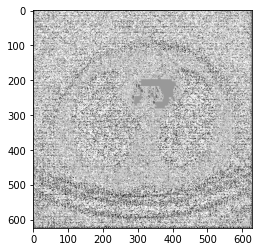

In [ ]:
plt.imshow(img, cmap = 'gray')
plt.show()